In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj13.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

4755

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0                  BTS           3360
1                Queen           2033
2           Samuel Kim           1704
3         Taylor Swift           1570
4      Hiroyuki Sawano           1046
5  TOMORROW X TOGETHER            869
6          Kevin Kiner            819
7              Agust D            573
8               Busted            569
9                 DAY6            511

<AxesSubplot:ylabel='Artist'>

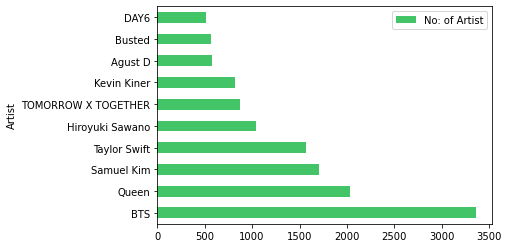

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['BTS', 'Queen', 'Samuel Kim', 'Taylor Swift', 'Hiroyuki Sawano', 'TOMORROW X TOGETHER', 'Kevin Kiner', 'Agust D', 'Busted', 'DAY6']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['FOOL', 'Deep in love', 'EMERGENCY', 'Not Fine', 'Not Mine', 'Stop Talking', '365247', 'Sweet Chaos', 'Like a flowing wind', 'OUCH', 'About Now', 'Rescue Me', 'Deep in love', 'EMERGENCY', 'Not Fine', 'Not Mine', 'Stop Talking', '365247', 'Sweet Chaos', 'Like a flowing wind', 'OUCH', 'About Now', 'Rescue Me', 'Jump', 'AH YEAH', 'Jump', 'DRESS UP', 'AH YEAH', 'Dduk (JINU SOLO)', 'FIANCÉ', '고백하는 거야 Confession', 'ZOO', '컬러링 Color Ring', 'BABY BABY', 'Well', 'PdHyF 6x12: Spoilers por acción y omisión en la 4ª temporada de Juego de tronos', 'For me', 'Best Part', 'How to love', '365247', 'Like a flowing wind', 'Rescue Me', 'Stop Talking', 'Deep in love', 'Sweet Chaos', 'About Now', 'OUCH', 'EMERGENCY', 'Not Fine', 'Not Mine', '365247', 'Like a flowing wind', 'Like a flowing wind', 'Rescue Me', 'Stop Talking', 'Deep in love', 'Sweet Chaos', 'Not Mine', 'Not Fine', 'About Now', 'OUCH', 'EMERGENCY', '365247', 'Like a flowing wind', 'Rescue Me', 'Stop Talking', 'Deep in love', 'Sweet Chaos', 'N

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['0L5gFNrzHyh4OhMwEz6DGS', '2klOcJJgpSbxBsLzGbXOry', '4ZkQ2t966y0fmTW6TWNwR2', '4r2pzvLIdg0Zgk5Bef7mIV', '67C8NRYbI2XwiYilezmxZQ', '2bLkmqu7U6HhLeVyQXEY1t', '6y722oXVv5JxS8aUuogxV5', '499qjESUqiZjlNI7XQhyLp', '6RW5fxlCyOxfBJbru1v9ol', '0mfBEZtTbXZY1o7zolRRun', '59SpSJIhUabBPX5iseriso', '0mjAU3yKR1QnXnHtjGJqTM', '2klOcJJgpSbxBsLzGbXOry', '4ZkQ2t966y0fmTW6TWNwR2', '4r2pzvLIdg0Zgk5Bef7mIV', '67C8NRYbI2XwiYilezmxZQ', '2bLkmqu7U6HhLeVyQXEY1t', '6y722oXVv5JxS8aUuogxV5', '499qjESUqiZjlNI7XQhyLp', '6RW5fxlCyOxfBJbru1v9ol', '0mfBEZtTbXZY1o7zolRRun', '59SpSJIhUabBPX5iseriso', '0mjAU3yKR1QnXnHtjGJqTM', '26BRyBLypJFKfRZUuLIQkm', '3LXpZ28ebxPHH1aUc9167L', '26BRyBLypJFKfRZUuLIQkm', '6TEvgyLcjZpRxCwlwS6ZLp', '3LXpZ28ebxPHH1aUc9167L', '7IqxadboF7BZb84L01cCUj', '6Tw2x3wavaWsboio2Cy44I', '2HpYrrrf4mA84To3PCsvSR', '3Ddny34bFoYBb8dIGq5lwp', '6viJhP1omFP37DdRHO6Gk7', '4lDKORchTM8Rd0PFQFXTLX', '3iw6V4LH7yPj1ESORX9RIN', None, '7xx7mUGAPcMd6gGqHzoec9', '5ug4vqGZ3eisGhY1IsziNX', '1ZOROX1KhC9xipkXFCxeDf', '6y72

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

12806


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 12806/12806 [31:04<00:00,  6.87it/s] 


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  0L5gFNrzHyh4OhMwEz6DGS   0.773    0.0938  128.001       0.0479   
1  2klOcJJgpSbxBsLzGbXOry   0.794    0.2140  128.085       0.0414   
2  4ZkQ2t966y0fmTW6TWNwR2   0.817    0.3790  142.783       0.2540   
3  4r2pzvLIdg0Zgk5Bef7mIV   0.692    0.3690  182.053       0.0405   
4  67C8NRYbI2XwiYilezmxZQ   0.595    0.0573   85.010       0.0349   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.2300          0.000001             4.0         0.515  6.0   
1        0.0436          0.000001             4.0         0.734  1.0   
2        0.0730          0.000000             4.0         0.754  2.0   
3        0.0327          0.000000             4.0         0.498  2.0   
4        0.0998          0.000000             4.0         0.603  1.0   

   duration_ms  loudness  valence  mode                             track_uri  
0     210893.0    -4.848    0.379   1.0  spotify:track:0L5gFNrzHyh4OhMwEz6DGS  
1     208493.0    -5.897    0.368   1.0  spotify:track:2klOcJJgpSbxBsLzGbXOry  
2     177280.0    -5.283    0.269   1.0  spotify:track:4ZkQ2t966y0fmTW6TWNwR2  
3     215790.0    -2.953    0.465   1.0  spotify:track:4r2pzvLIdg0Zgk5Bef7mIV  
4     195684.0    -2.727    0.645   0.0  spotify:track:67C8NRYbI2XwiYilezmxZQ

In [20]:
audioFeaturesDF_AllTracks.shape

(12806, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   0L5gFNrzHyh4OhMwEz6DGS   0.773    0.0938  128.001       0.0479   
1   2klOcJJgpSbxBsLzGbXOry   0.794    0.2140  128.085       0.0414   
2   4ZkQ2t966y0fmTW6TWNwR2   0.817    0.3790  142.783       0.2540   
3   4r2pzvLIdg0Zgk5Bef7mIV   0.692    0.3690  182.053       0.0405   
4   67C8NRYbI2XwiYilezmxZQ   0.595    0.0573   85.010       0.0349   
5   2bLkmqu7U6HhLeVyQXEY1t   0.766    0.0423  170.065       0.3700   
6   6y722oXVv5JxS8aUuogxV5   0.894    0.1950  110.047       0.0619   
7   499qjESUqiZjlNI7XQhyLp   0.937    0.5100  199.692       0.0737   
8   6RW5fxlCyOxfBJbru1v9ol   0.698    0.3230  159.971       0.0264   
9   0mfBEZtTbXZY1o7zolRRun   0.637    0.2890   92.002       0.0781   
10  59SpSJIhUabBPX5iseriso   0.545    0.1360  127.994       0.1410   
11  0mjAU3yKR1QnXnHtjGJqTM   0.605    0.6940  121.049       0.0433   
12  2klOcJJgpSbxBsLzGbXOry   0.794    0.2140  128.085       0.0414   
13  4ZkQ2t966y0fmTW6TWNwR2   0.817    0.3790  142.783       0.2540   
14  4r2pzvLIdg0Zgk5Bef7mIV   0.692    0.3690  182.053       0.0405   
15  67C8NRYbI2XwiYilezmxZQ   0.595    0.0573   85.010       0.0349   
16  2bLkmqu7U6HhLeVyQXEY1t   0.766    0.0423  170.065       0.3700   
17  6y722oXVv5JxS8aUuogxV5   0.894    0.1950  110.047       0.0619   
18  499qjESUqiZjlNI7XQhyLp   0.937    0.5100  199.692       0.0737   
19  6RW5fxlCyOxfBJbru1v9ol   0.698    0.3230  159.971       0.0264   

    acousticness  instrumentalness  time_signature  danceability   key  \
0        0.23000          0.000001             4.0         0.515   6.0   
1        0.04360          0.000001             4.0         0.734   1.0   
2        0.07300          0.000000             4.0         0.754   2.0   
3        0.03270          0.000000             4.0         0.498   2.0   
4        0.09980          0.000000             4.0         0.603   1.0   
5        0.01890          0.000000             4.0         0.647   5.0   
6        0.01720          0.000143             4.0         0.734   9.0   
7        0.00502          0.000000             4.0         0.335  11.0   
8        0.08670          0.000000             4.0         0.489  10.0   
9        0.03790          0.000000             4.0         0.839   7.0   
10       0.32100          0.000000             4.0         0.812   0.0   
11       0.15600          0.000000             4.0         0.759   7.0   
12       0.04360          0.000001             4.0         0.734   1.0   
13       0.07300          0.000000             4.0         0.754   2.0   
14       0.03270          0.000000             4.0         0.498   2.0   
15       0.09980          0.000000             4.0         0.603   1.0   
16       0.01890          0.000000             4.0         0.647   5.0   
17       0.01720          0.000143             4.0         0.734   9.0   
18       0.00502          0.000000             4.0         0.335  11.0   
19       0.08670          0.000000             4.0         0.489  10.0   

    duration_ms  loudness  valence  mode                             track_uri  
0      210893.0    -4.848    0.379   1.0  spotify:track:0L5gFNrzHyh4OhMwEz6DGS  
1      208493.0    -5.897    0.368   1.0  spotify:track:2klOcJJgpSbxBsLzGbXOry  
2      177280.0    -5.283    0.269   1.0  spotify:track:4ZkQ2t966y0fmTW6TWNwR2  
3      215790.0    -2.953    0.465   1.0  spotify:track:4r2pzvLIdg0Zgk5Bef7mIV  
4      195684.0    -2.727    0.645   0.0  spotify:track:67C8NRYbI2XwiYilezmxZQ  
5      226818.0    -3.312    0.741   0.0  spotify:track:2bLkmqu7U6HhLeVyQXEY1t  
6      173419.0    -3.350    0.760   0.0  spotify:track:6y722oXVv5JxS8aUuogxV5  
7      227240.0    -1.895    0.529   0.0  spotify:track:499qjESUqiZjlNI7XQhyLp  
8      202750.0    -3.976    0.231   1.0  spotify:track:6RW5fxlCyOxfBJbru1v9ol  
9      137334.0    -5.482    0.843   1.0  spotify:track:0mfBEZtTbXZY1o7zolRRun  
10     179229.0    -8.165    0.742   1.0  spotify:track:59SpSJIhUabBPX5iseriso  
11     158900.0    -